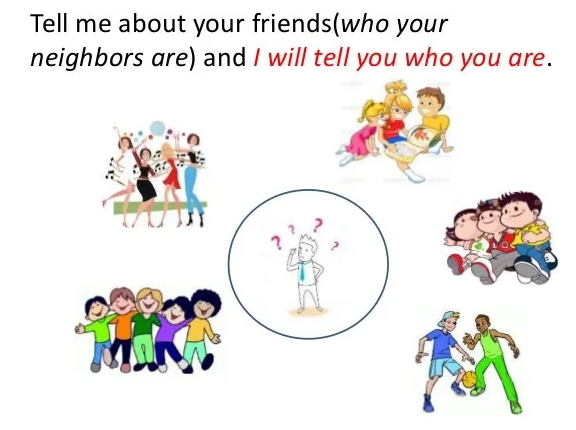

**K-Nearest Neighbors (KNN) Algorithm**

k-Nearest Neighbors (KNN) is one of the simplest and most intuitive machine learning algorithms used for both classification and regression tasks. Despite its simplicity, KNN can be quite effective in various scenarios. Here is a detailed explanation of KNN:
**
**Overview**
KNN is a non-parametric, instance-based learning algorithm. Unlike other supervised learning algorithms, KNN does not involve a training phase where a model is explicitly built. Instead, the algorithm relies directly on the entire dataset, making it a type of lazy learning.

**How KNN Works**
The core idea of KNN is to identify the 'k' nearest neighbors to a new, unknown data point, and then make predictions based on these neighbors. Here’s how it works:

1. **Distance Measurement**:
   - When a new data point needs to be classified or a value needs to be predicted, KNN calculates the distance between this point and all other points in the training dataset. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

2. **Neighbor Selection**:
   - The algorithm selects the 'k' nearest neighbors based on the calculated distances. The value of 'k' is a user-defined parameter and typically an odd number to avoid ties.

3. **Prediction**:
   - **Classification**: The new data point is assigned to the class that is most common among its 'k' nearest neighbors. This is done using a majority voting system.
   - **Regression**: The value of the new data point is predicted by averaging the values of its 'k' nearest neighbors.

**Characteristics of KNN**
- **Lazy Learning**: KNN does not involve a training phase. Instead, it memorizes the training dataset, and all computations are deferred until a prediction is needed.
- **Non-Parametric**: KNN does not assume any specific form for the underlying data distribution. It makes predictions based solely on the similarity of data points.
- **Simple and Intuitive**: The concept of finding the nearest neighbors is easy to understand and implement.
- **Computationally Intensive**: Since KNN involves calculating distances for all data points, it can be slow and inefficient for large datasets.

**Choosing the Value of 'k'**
- The performance of KNN largely depends on the choice of 'k'.
- **Small 'k'**: A small value of 'k' can lead to a model that is sensitive to noise in the data.
- **Large 'k'**: A large value of 'k' can smooth out noise but may also blur the distinctions between different classes.

**Advantages**
- **No Training Phase**: Eliminates the need for a training phase, making it quick to set up.
- **Adaptable**: Can be used for both classification and regression.
- **Versatile**: Effective for a wide range of problems if distance metric and 'k' value are chosen appropriately.

**Disadvantages**
- **Computational Cost**: High computational cost during prediction as it involves calculating distances for all data points.
- **Storage Requirements**: Requires storing the entire training dataset.
- **Sensitivity to Irrelevant Features**: Performance can degrade if the dataset has many irrelevant or redundant features.

**Practical Applications**
- **Recommendation Systems**: Used to recommend items based on user similarity.
- **Pattern Recognition**: Applied in image and speech recognition.
- **Medical Diagnosis**: Helps in classifying patients into different categories based on historical medical data.

# Exploratory Data Analysis and Visualization

**Gene Expression Dataset**

This dataset contains information about the expression levels of two genes and the presence of cancer.

**Columns:**
- **Gene One**: Expression level of the first gene.
- **Gene Two**: Expression level of the second gene.
- **Cancer Present**: Indicates the presence (1) or absence (0) of cancer.

In [ ]:
# Import necessary libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

plt.rcParams["figure.figsize"] = (10, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [6]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

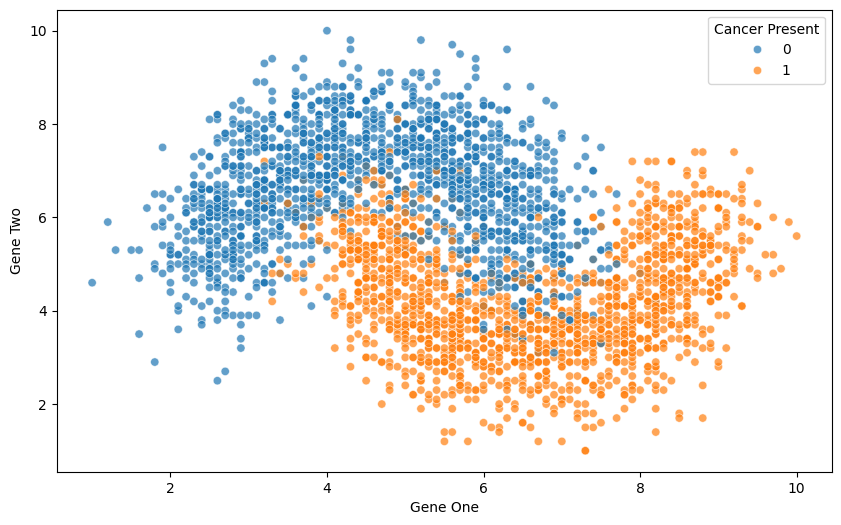

In [7]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.7);

# KNN algorithms perform better on datasets where classes are well-separated.
# They tend to perform poorly on datasets where the classes overlap significantly.
# For this dataset, the majority of errors will occur near the boundaries where the classes overlap or mix.

(4.0, 8.0)

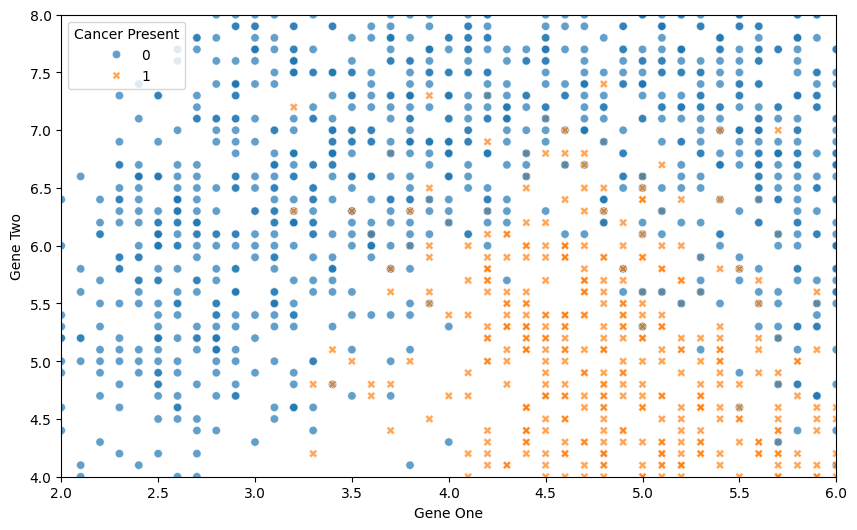

In [8]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

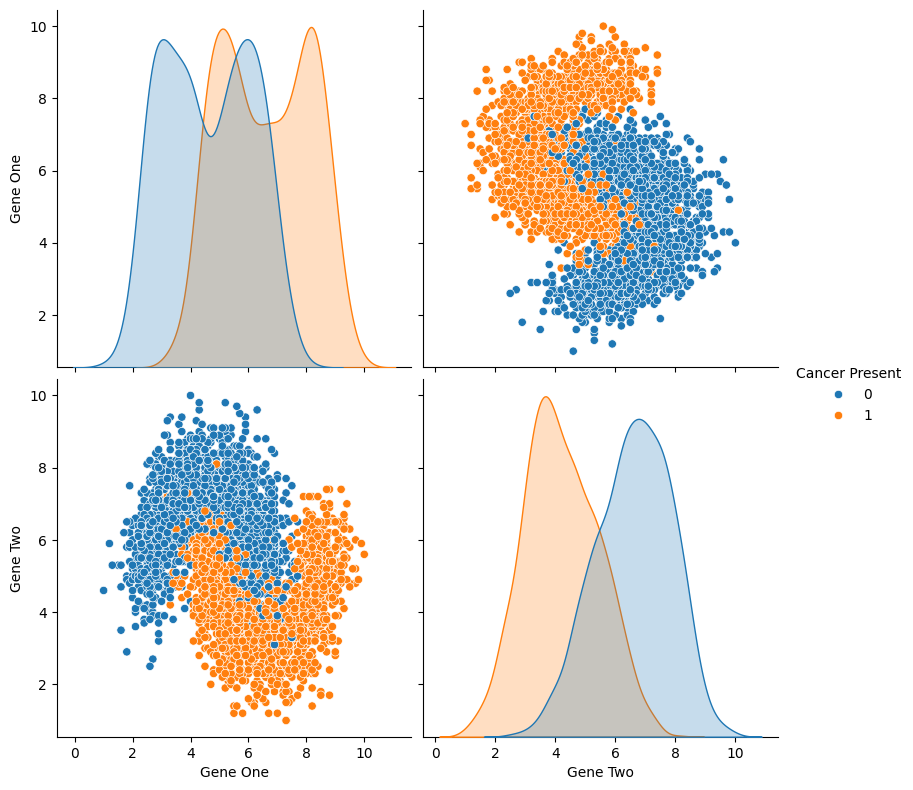

In [9]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

# For the "Gene one" feature, two classes appear to overlap by nearly 50%.
# For the "Gene two" feature, the overlap between the two classes is about 25%.
# We can conclude that "Gene two" is a more distinguishing and important feature.
# However, 2D visualizations might be misleading. Insights obtained from here should also be confirmed using Boxplots.

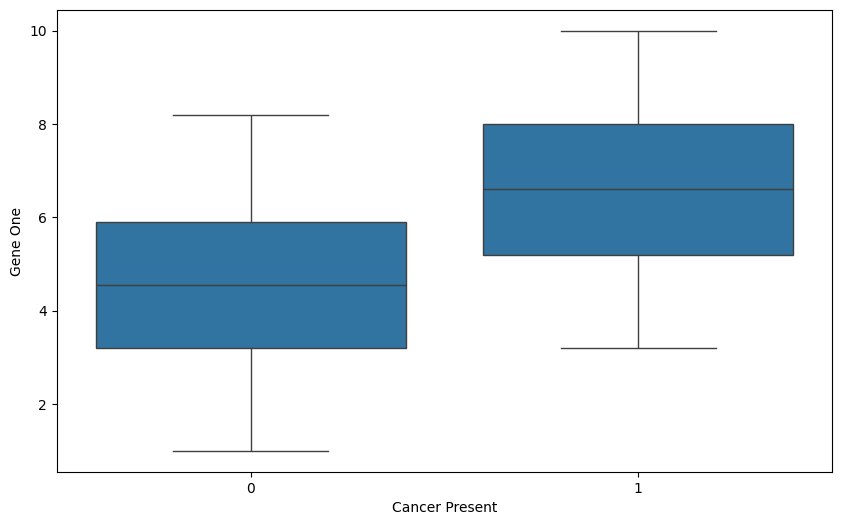

In [10]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df);

# As "Gene One" increases, the risk of cancer also increases.
# The insights we obtain from the Pairplot can also be observed here.
# Specifically for "Gene One", the two classes overlap more compared to "Gene Two."

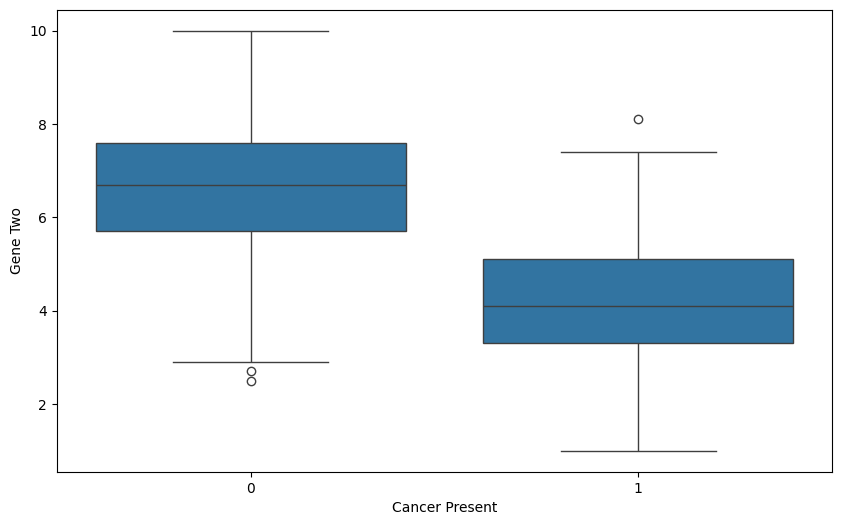

In [11]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df);

# As "Gene Two" decreases, the risk of cancer increases.
# The insights we obtain from the Pairplot can also be observed here.
# Specifically for "Gene Two", the two classes overlap less compared to "Gene One."

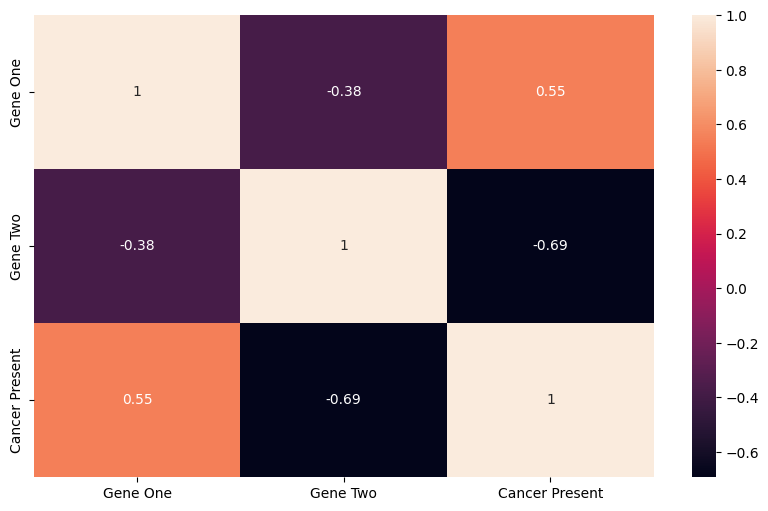

In [12]:
sns.heatmap(df.corr(), annot = True); 

# Patients with "Gene 1" expression have a higher risk of cancer, while those with "Gene 2" expression have a lower risk.

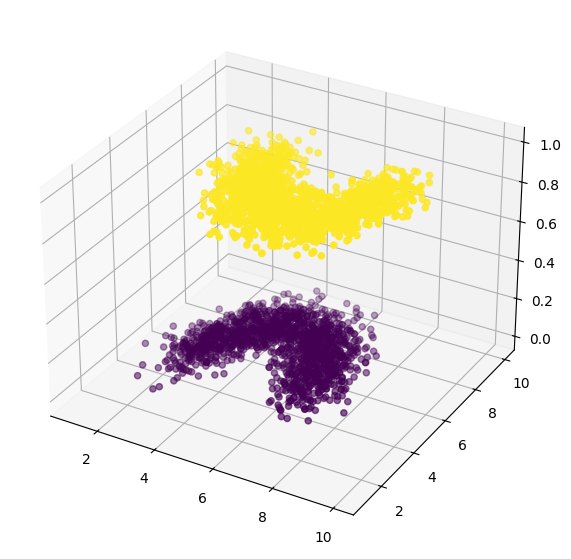

In [13]:
%matplotlib inline
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present'])
plt.show()

# Modellling

## Train|Test Split

In [14]:
X= df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

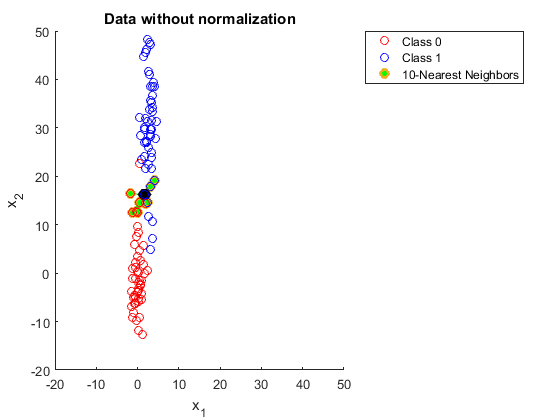

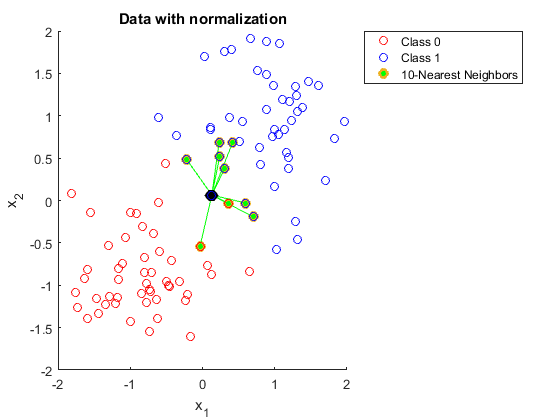

**Importance of Scaling in k-Nearest Neighbors (kNN) Algorithm**

The kNN algorithm relies on **distance metrics** between samples. The range of values for **features** plays a crucial role in these distance calculations.

**Why is Scaling Important?**

1. **Equal Contribution of Features**: Different features often have different value ranges. For example, age might range from 0 to 100, while income might range from 0 to 10,000. **Scaling** ensures that all features contribute equally to the distance calculations.
2. **Faster Convergence**: Scaling can help the algorithm work faster and more efficiently.
3. **Better Performance**: Appropriate scaling can improve the overall performance of the model.

**Scaling Methods**

- **Min-Max Scaling**: Suitable for data with large scale differences.
- **Z-Score Normalization (StandardScaler)**: Ideal for data close to a normal distribution with few outliers.
- **Robust Scaling**: Can be used to reduce the influence of outliers.

**Application Recommendations**

- **Choice Based on Dataset Structure**: If there are large differences in the values of features, Min-Max Scaling may be preferred. Otherwise, Z-Score Scaling might be more appropriate.
- **Distribution and Outliers**: For normally distributed data with few outliers, Z-Score is preferred; otherwise, Min-Max might be more suitable.
- **Categorical Data**: For categorical data without order, Min-Max Scaling may not be meaningful.
- **Model Dependence**: In distance-based models, scaling of features is important.

Scaling is crucial for distance-based algorithms like kNN. Choosing the correct scaling method can increase the accuracy and stability of the algorithm.

The choice of which scaling method to use depends on the nature of the dataset, the distribution of features, the characteristics of the model to be used, and hyperparameter tuning.


The choice of which scaling method to use depends on the nature of the dataset, the distribution of features, the characteristics of the model to be used, and hyperparameter tuning.

In [16]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))] # default value is 5

In [17]:
pipe_model = Pipeline(steps = operations)

In [18]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

### Predictions

In [19]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [20]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

In [21]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
595,1.0,0.0
596,0.8,0.2
597,1.0,0.0
598,1.0,0.0


In [22]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [23]:
pd.DataFrame(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2087,0,0,0.2,0.8
1094,1,1,0.8,0.2
2743,1,1,0.8,0.2
210,1,1,1.0,0.0
1745,1,1,1.0,0.0
1089,0,0,0.0,1.0
685,1,1,1.0,0.0
1817,1,1,1.0,0.0
203,1,1,1.0,0.0
457,0,0,0.4,0.6


## Model Performance on Classification Tasks

In [24]:
confusion_matrix(y_test, y_pred)

array([[306,  22],
       [ 26, 246]])

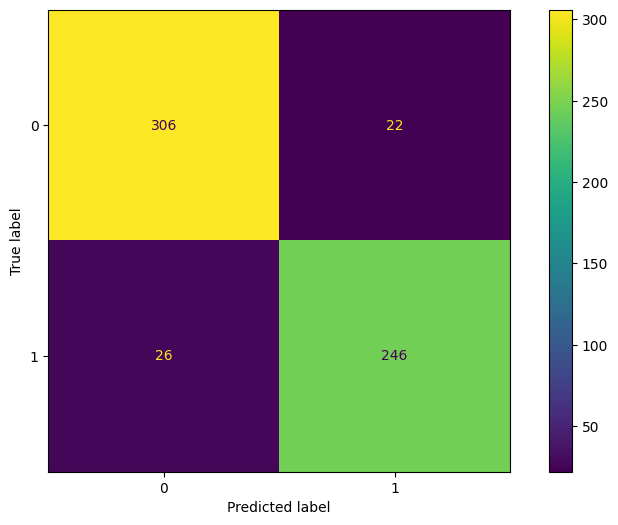

In [25]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[306  22]
 [ 26 246]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       328
           1       0.92      0.90      0.91       272

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600


Train_Set
[[1108   64]
 [  68 1160]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1172
           1       0.95      0.94      0.95      1228

    accuracy                           0.94      2400
   macro avg       0.94      0.95      0.94      2400
weighted avg       0.95      0.94      0.95      2400



## Elbow Method for Choosing Reasonable K Values

**The KNN Elbow Method** is a technique used to determine the optimal k value in the k-Nearest Neighbors (KNN) algorithm. This method calculates training and validation errors for different k values and visualizes how the errors change. The goal is to find the point where the errors significantly decrease and then level off. This point is often referred to as the "elbow" and represents the optimal k value.

**How It Works:**
1. **Different k Values:** Select a range of k values (e.g., from 1 to 20).
2. **Error Calculation:** Train the model for each k value and calculate training and validation errors.
3. **Visualization:** Plot the errors (k-error graph). Look for a distinct elbow point in the graph.
4. **Elbow Point:** Identify the k value where the errors rapidly decrease and then stabilize.

**Advantages:**
- **Reducing Complexity:** Selecting the optimal k value can reduce the model's complexity and computational cost.
- **Improving Model Performance:** The correct k value can enhance the model's accuracy and overall performance.

**Disadvantages:**
- **Visual Interpretation:** Determining the elbow point requires visual interpretation and may not always be clearly identifiable.

In [28]:
test_error_rates = []
for k in range(1,30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    accuracy_mean = scores["test_accuracy"].mean()
    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)

# To select the optimal K value:
# - If the dataset is balanced, we use accuracy.
# - If the dataset is unbalanced, we focus on the recall metric for the target class.
# For each K value (ranging from 1 to 30), we first calculate the accuracy score and then subtract it from 1 to obtain the error score for each K.
# Since finding the optimal K value using the test dataset (hold-out set) might lead to data leakage,
# we use the train dataset in cross-validation (CV) and base our decision on the average error scores across the validation sets.

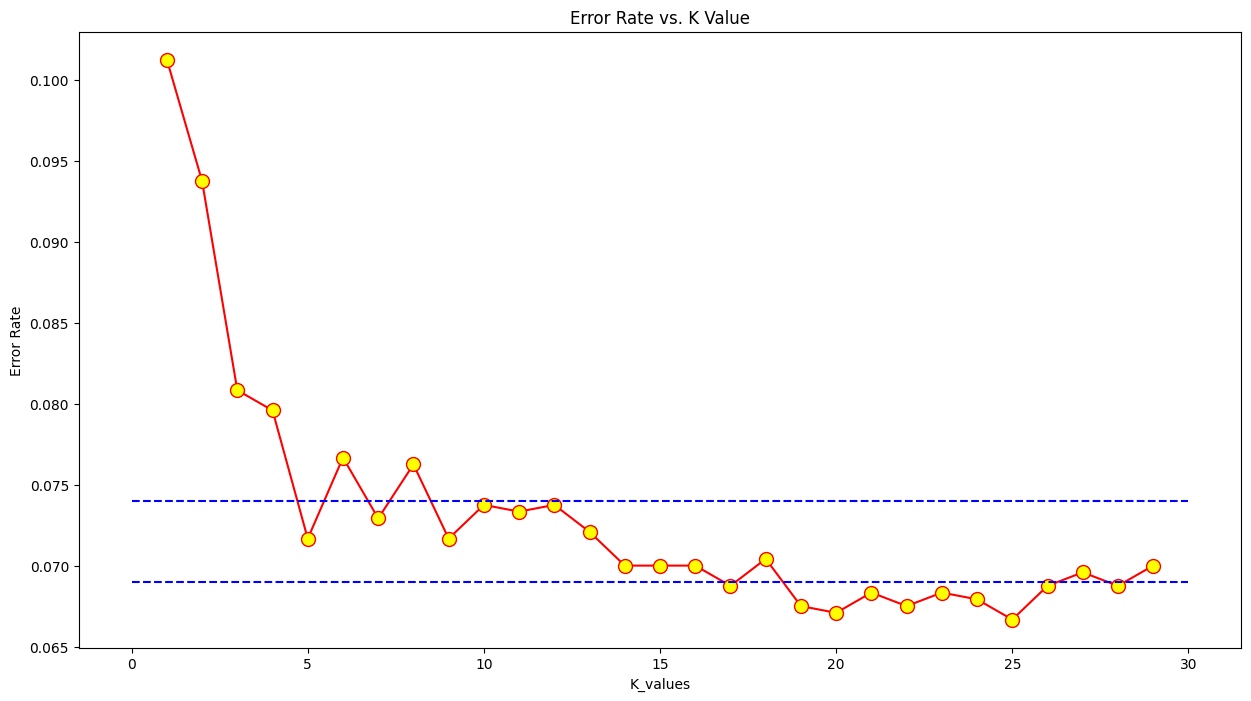

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='b', linestyles="--")
plt.show()
# Visualize the error scores that we calculated.

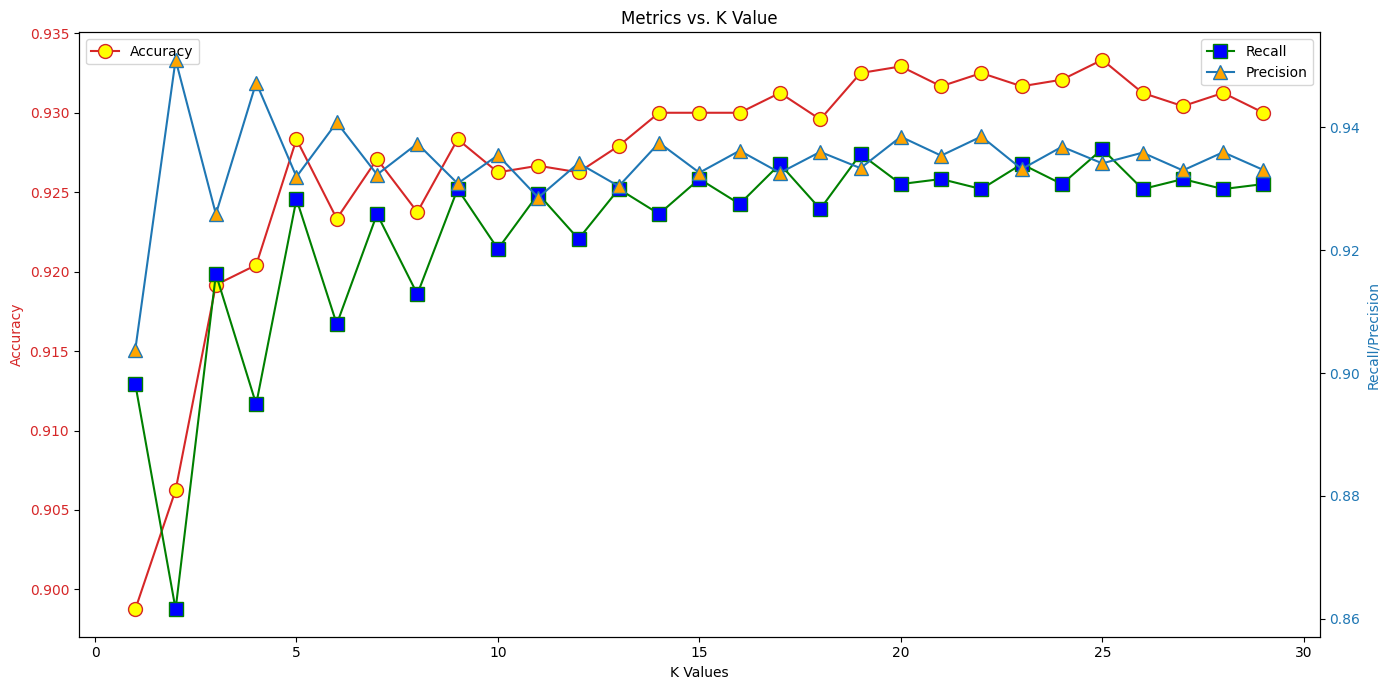

In [30]:
from sklearn.metrics import make_scorer

accuracy_scores = []
recall_scores = []
precision_scores = []

for k in range(1, 30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    }
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=scoring, cv=10)
    
    accuracy_mean = scores["test_accuracy"].mean()
    recall_mean = scores["test_recall"].mean()
    precision_mean = scores["test_precision"].mean()
    
    accuracy_scores.append(accuracy_mean)
    recall_scores.append(recall_mean)
    precision_scores.append(precision_mean)

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(range(1, 30), accuracy_scores, color=color, marker='o', markerfacecolor='yellow', markersize=10, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Recall/Precision', color=color)
ax2.plot(range(1, 30), recall_scores, color='green', marker='s', markerfacecolor='blue', markersize=10, label='Recall')
ax2.plot(range(1, 30), precision_scores, color=color, marker='^', markerfacecolor='orange', markersize=10, label='Precision')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Metrics vs. K Value')
fig.tight_layout()
plt.show()

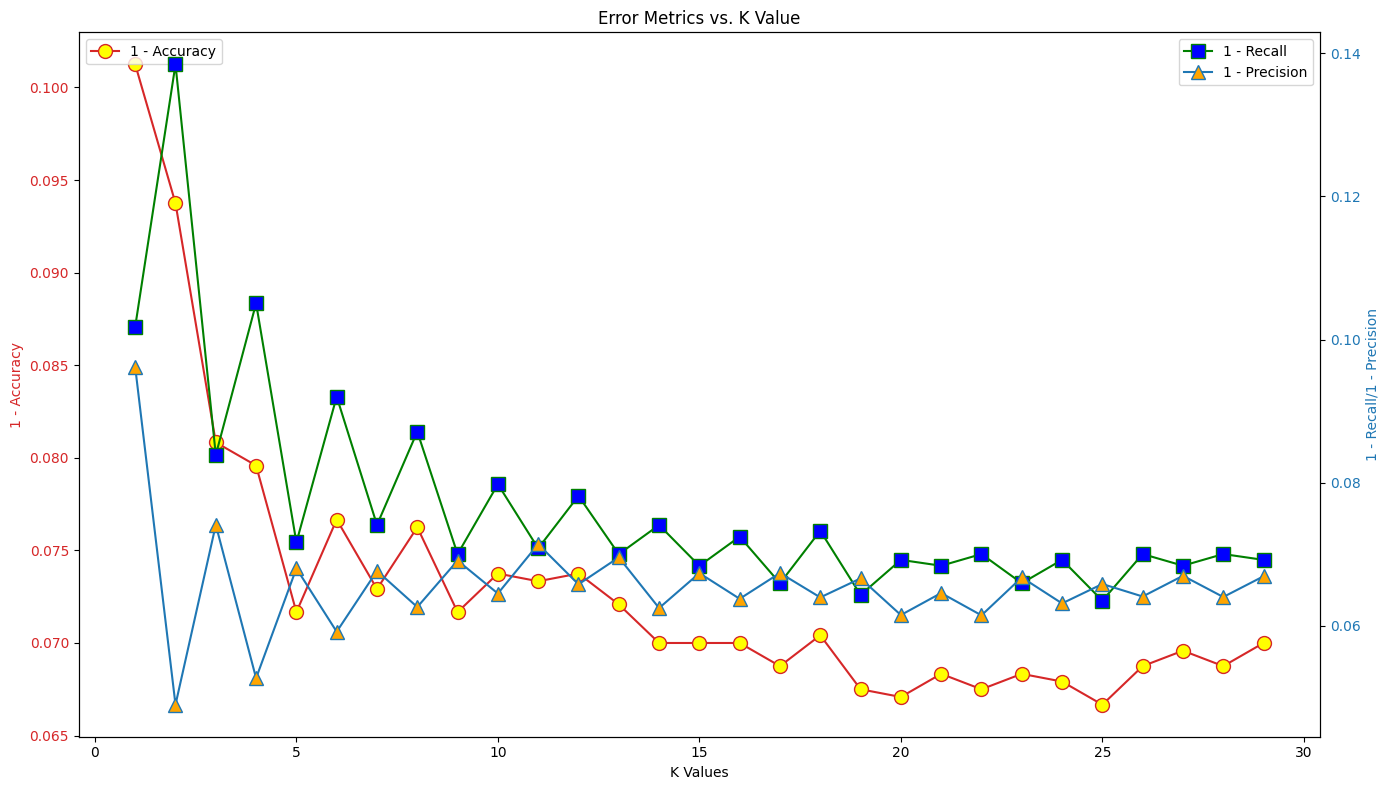

In [31]:
accuracy_errors = []
recall_errors = []
precision_errors = []

for k in range(1, 30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    }
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=scoring, cv=10)
    
    accuracy_mean = scores["test_accuracy"].mean()
    recall_mean = scores["test_recall"].mean()
    precision_mean = scores["test_precision"].mean()
    
    accuracy_errors.append(1 - accuracy_mean)
    recall_errors.append(1 - recall_mean)
    precision_errors.append(1 - precision_mean)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('K Values')
ax1.set_ylabel('1 - Accuracy', color=color)
ax1.plot(range(1, 30), accuracy_errors, color=color, marker='o', markerfacecolor='yellow', markersize=10, label='1 - Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('1 - Recall/1 - Precision', color=color)
ax2.plot(range(1, 30), recall_errors, color='green', marker='s', markerfacecolor='blue', markersize=10, label='1 - Recall')
ax2.plot(range(1, 30), precision_errors, color=color, marker='^', markerfacecolor='orange', markersize=10, label='1 - Precision')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Error Metrics vs. K Value')
fig.tight_layout()
plt.show()

## Overfiting and underfiting control for k values

In [32]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

# Repeat the same process as above using the train data provided in cross-validation (CV) and 
# compare the average error scores of the validation and train datasets.
# This allows us to more easily detect any overfitting.

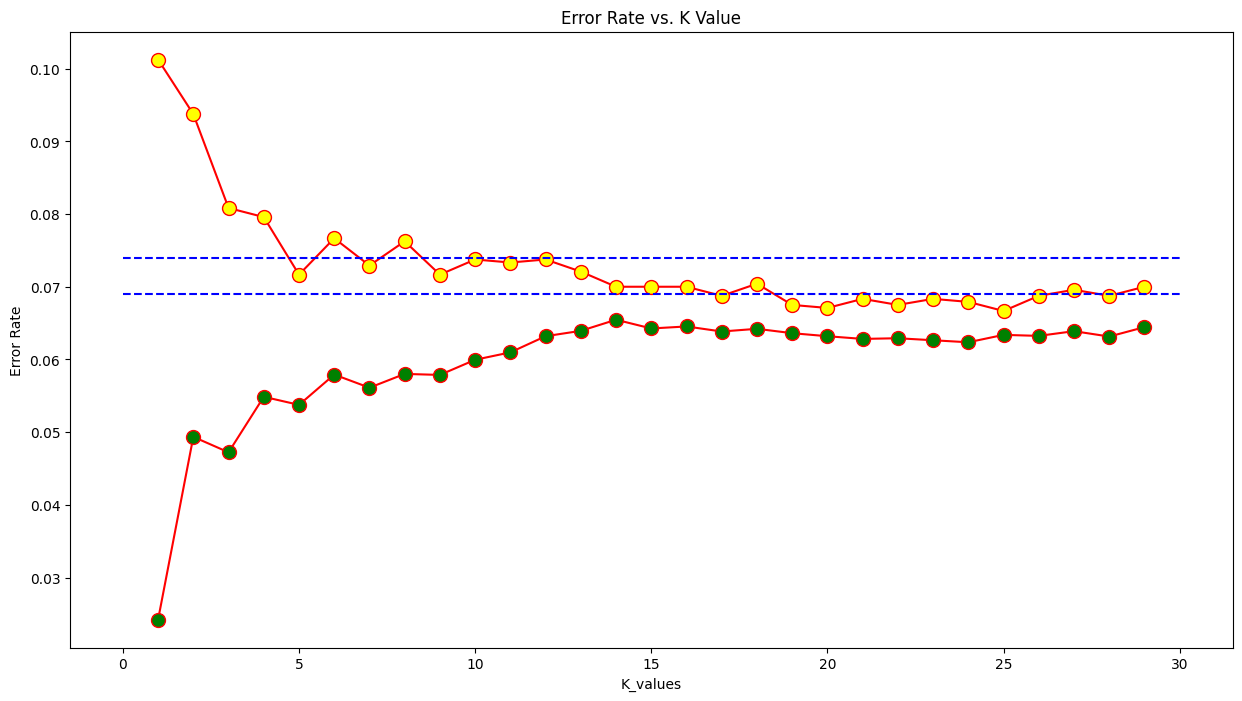

In [33]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='red', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.plot(range(1,30), train_error_rates, color='red', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.show()

# The yellow bars represent scores for the validation data, while the green bars represent scores for the train data.
# For the validation data, the lowest error score is achieved at K=21. However, if we choose K=21,
# the model's complexity and computational cost will significantly increase.
# For K=9, the error score is 0.074, whereas for K=21, it is 0.069.
# Is a difference of 0.005 worth the additional complexity and computational cost? This is something we should carefully consider.
# For such a small difference, it is not worth incurring the extra cost.
# At K=21, the error scores for both validation and train datasets are almost identical.
# However, at K=9, the error score for the validation data is 0.074, while for the train data it is 0.060.
# The difference is 0.014, which is very small, making K=9 a reasonable and cost-effective choice.

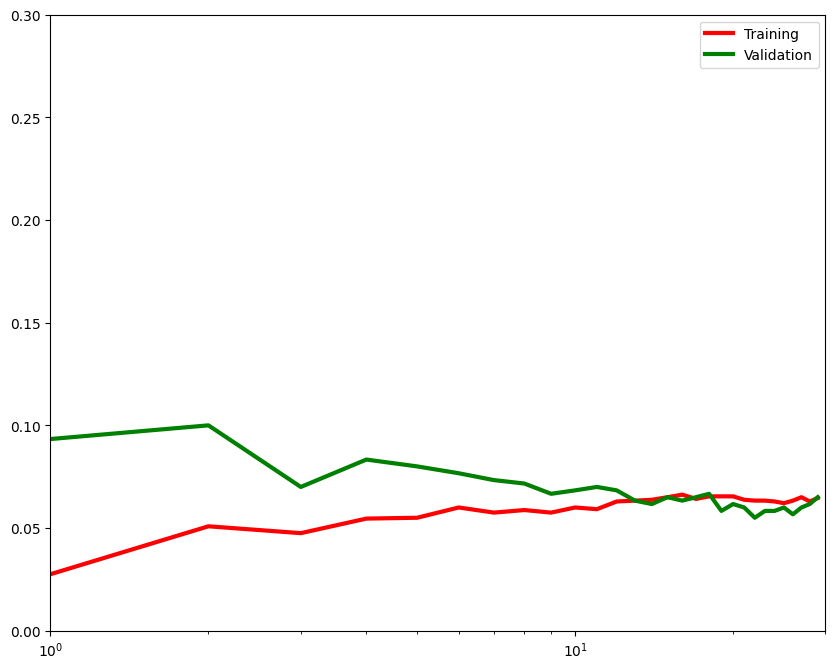

In [70]:
# Define the range of K values to evaluate.
K = range(1, 30)

# Lists to store training and validation error scores.
train_error_rates = []
test_error_rates = []

# Running the KNN model for different K values.
for k in K:
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train, y_train)
    
    train_pred = knn_pipe_model.predict(X_train)
    test_pred = knn_pipe_model.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    train_error_rates.append(train_error)
    test_error_rates.append(test_error)

# Calculate the training and validation error scores.
train_err = train_error_rates
val_err = test_error_rates

# Creating a graph to visualize the training and validation error scores for different K values.
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plotting the training and validation error scores to analyze their behavior across different K values.
ax.semilogx(K, train_err, 'r-', lw=3, label='Training')
ax.semilogx(K, val_err, 'g-', lw=3, label='Validation')

ax.legend()

ax.set_xlim(1, 30)
ax.set_ylim(0, 0.3)  
plt.show()

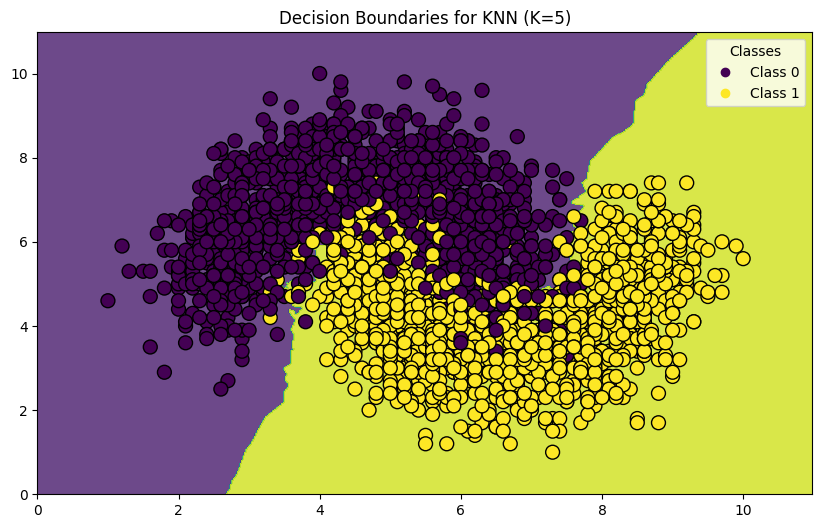

In [36]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn_pipe_model = Pipeline(steps=operations)
knn_pipe_model.fit(X_train, y_train)

h = .02  

x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pipe_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', s=100)

plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'], loc='upper right', title="Classes")
plt.title(f"Decision Boundaries for KNN (K=5)")
plt.show()

## Scores by Various K Values

In [34]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)
knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

WITH K=1

Test_Set
[[299  29]
 [ 27 245]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       328
           1       0.89      0.90      0.90       272

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600


Train_Set
[[1141   31]
 [  35 1193]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1172
           1       0.97      0.97      0.97      1228

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



In [53]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=6))]
knn6 = Pipeline(steps=operations)
knn6.fit(X_train, y_train)
print('WITH K=6\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

WITH K=6

Test_Set
[[311  17]
 [ 18 254]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Train_Set
[[1088   84]
 [  73 1155]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1172
           1       0.93      0.94      0.94      1228

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [54]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=19))]
knn19 = Pipeline(steps=operations)
knn19.fit(X_train, y_train)
print('WITH K=19\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

WITH K=19

Test_Set
[[311  17]
 [ 18 254]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Train_Set
[[1088   84]
 [  73 1155]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1172
           1       0.93      0.94      0.94      1228

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [52]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)
knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

WITH K=9

Test_Set
[[311  17]
 [ 18 254]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Train_Set
[[1088   84]
 [  73 1155]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1172
           1       0.93      0.94      0.94      1228

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [39]:
k_list = [3, 6, 9, 16, 21, 22, 23]
 
for i in k_list:
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[308  20]
 [ 22 250]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       328
           1       0.93      0.92      0.92       272

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600


Train_Set
[[1116   56]
 [  58 1170]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1172
           1       0.95      0.95      0.95      1228

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

WITH K=6

Test_Set
[[310  18]
 [ 28 244]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       328
           1       0.93      0.90      0.91       272

    accuracy                           0.92       600
   mac

## Cross Validate For Optimal K Value

In [40]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.928333
train_accuracy     0.942130
test_precision     0.930861
train_precision    0.940203
test_recall        0.929968
train_recall       0.947160
test_f1            0.930139
train_f1           0.943660
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

**Hyperparameters of the K-Nearest Neighbors (KNN) Algorithm**

The KNN algorithm can be configured with a set of parameters. These parameters can affect the performance and accuracy of the model.

**Explanation of Hyperparameters**

1. **n_neighbors**:
   - **Number of neighbors (K)**.
   - Determines the number of neighbors used to classify or predict a new data point.
   - Setting an appropriate value can impact the success of the model.
   - Typically, a small and odd value is preferred.

2. **weights**:
   - **Method for weighting neighbors' contributions**.
   - **"uniform"**: Each neighbor has equal weight.
   - **"distance"**: Weights are proportional to the inverse of their distance.

3. **algorithm**:
   - **Method to compute the nearest neighbors**.
   - Options: **"auto"**, **"ball_tree"**, **"kd_tree"**, **"brute"**.
   - **"auto"**: Automatically selects the best algorithm based on the dataset.
   - **"ball_tree"** and **"kd_tree"**: Fast neighbor search.
   - **"brute"**: Performs exhaustive search by comparing all points.

4. **leaf_size**:
   - **Leaf size in "ball_tree" or "kd_tree" algorithms**.
   - Larger leaf size may reduce memory usage but can slow down the search.

5. **p**:
   - **Type of distance metric**.
   - **p = 1**: Manhattan distance.
   - **p = 2**: Euclidean distance.
   - The Minkowski distance is a general form that includes both metrics.

6. **metric**:
   - **Defines the distance metric**.
   - Default is **"minkowski"**, which represents Manhattan or Euclidean distance based on **p**.
   - Other options: **"manhattan"**, **"euclidean"**, **"cosine"**, etc.

7. **metric_params**:
   - **Additional parameters for the distance metric**.
   - For example, the covariance matrix for Mahalanobis distance.

8. **n_jobs**:
   - **Number of parallel jobs to run**.
   - **n_jobs = -1**: Uses all processor cores.

These parameters can be fine-tuned to optimize the performance of the KNN algorithm for specific datasets and tasks.

In [43]:
import mglearn

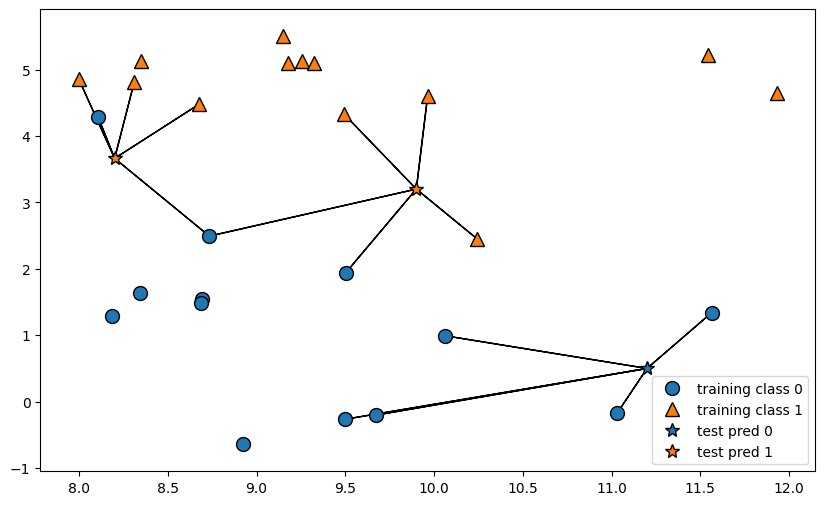

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors=5);

In [41]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [46]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [45]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [47]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=5, scoring= "accuracy", return_train_score=True)

In [48]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [51]:
eval_metric(knn_grid_model,X_train, y_train, X_test, y_test )

Test_Set
[[311  17]
 [ 20 252]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       328
           1       0.94      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Train_Set
[[1095   77]
 [  80 1148]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1172
           1       0.94      0.93      0.94      1228

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



## Evaluating ROC Curves and AUC

In [57]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

In [58]:
knn9.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

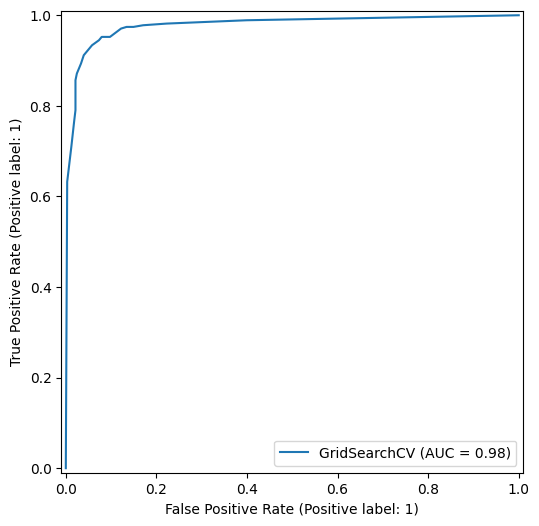

In [59]:
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [60]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

np.float64(0.9727739418938308)

# Final Model and Model Deployment

In [61]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

In [62]:
final_model = Pipeline(steps=operations)

In [63]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [64]:
import pickle
pickle.dump(final_model, open("knn_final_model", "wb"))

## Predict New Observations

In [65]:
loaded_model = pickle.load(open("knn_final_model", "rb"))

In [66]:
new_obs = {"Gene One": [1.1, 3.2, 4.1, 5.7, 7.2, 9.3, 2.1, 6.1],
           "Gene Two": [1.2, 4.1, 4.2, 5.4, 6.8, 10.2, 7.9, 1.1]
          }

In [67]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.1,1.2
1,3.2,4.1
2,4.1,4.2
3,5.7,5.4
4,7.2,6.8
5,9.3,10.2
6,2.1,7.9
7,6.1,1.1


In [68]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [69]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.1,1.2,0,0.000000,1.000000
1,3.2,4.1,0,0.111111,0.888889
2,4.1,4.2,1,0.888889,0.111111
3,5.7,5.4,0,0.111111,0.888889
4,7.2,6.8,0,0.000000,1.000000
5,9.3,10.2,1,0.555556,0.444444
6,2.1,7.9,0,0.000000,1.000000
7,6.1,1.1,1,1.000000,0.000000
